In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


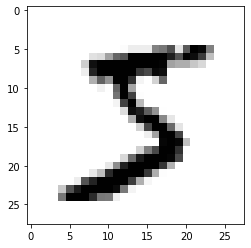

In [13]:
plt.imshow(x_train[0],cmap='gray_r')

In [14]:
y_train[0]

5

In [19]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
x_train = x_train/x_train.max() # /255
x_test = x_test/x_test.max() #/255

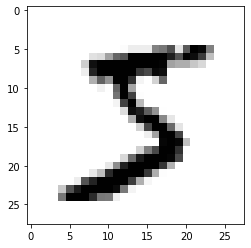

In [26]:
plt.imshow(x_train[0],cmap='gray_r')

In [28]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [30]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [31]:
model.summaryary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [32]:
model.fit(x_train,y_cat_train,batch_size=128,validation_data=(x_test,y_cat_test),epochs=10)

Epoch 1/10
469/469 [==============================] - 91s 91ms/step - loss: 0.3890 - accuracy: 0.8768 - val_loss: 0.0635 - val_accuracy: 0.9798
Epoch 2/10
469/469 [==============================] - 39s 82ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 3/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0318 - val_accuracy: 0.9889
Epoch 4/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0257 - val_accuracy: 0.9925
Epoch 6/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0283 - val_accuracy:

In [33]:
model.save('mnist.h5')

In [51]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0261 - accuracy: 0.9926


[0.026082800701260567, 0.9926000237464905]

In [52]:
from sklearn.metrics import classification_report

In [54]:
predictions = model.predict_classes(x_test)

In [56]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [57]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [58]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, ImageOps
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        
        a,b,c,d = rect
        rect=(a+4,b+4,c+100,d+100)
        
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+' : '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()